In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()
data = iris.data
data[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [21]:
def pm(data):
    n = data.shape[0]
    pm = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, hn):
            pm[i, j] = np.linalg.norm(data[i] - data[j])
            pm[j, i] = pm[i, j]
    return pm


In [22]:
print(pm(data))

[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


In [23]:
def den(data, method):
    linkage_m = linkage(data, method=method)
    dendrogram(linkage_m)
    plt.title(f"Dendrogrm for {method} linkage")
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()


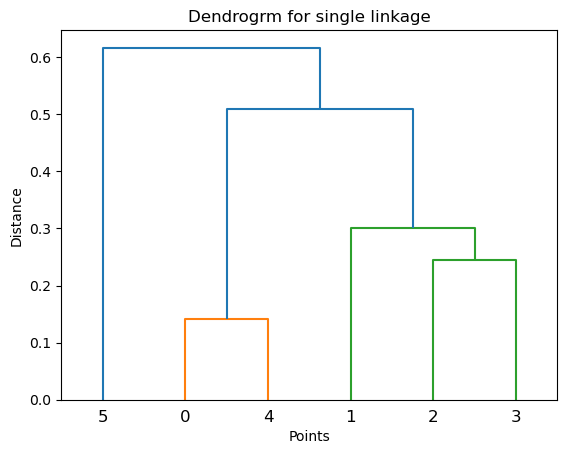

In [24]:
den(data, 'single')

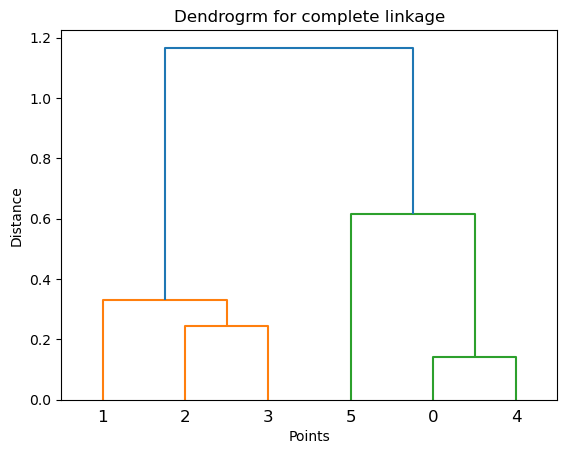

In [25]:
den(data, 'complete')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
data = iris.data[:4]
print(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [28]:
def kmeans(X, K, max_iters):
    centroids = X[:K]
    for _i in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        if np.all(centroids == new_centroids):
           break
        centroids = new_centroids

    return labels, centroids

In [29]:
#X=np.array(data.iloc[:, :-1].values)
X = iris.data
labels, c=kmeans(X, 3, 200)
print(labels)
print(c)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


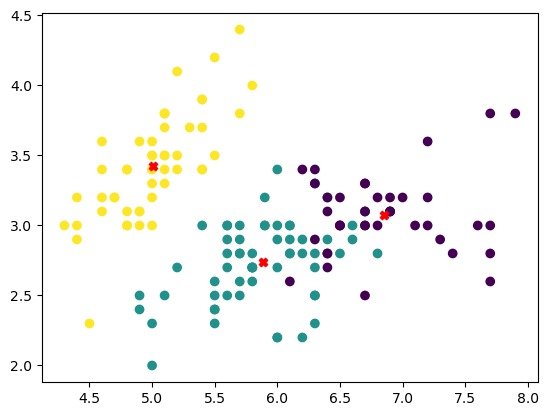

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(c[:, 0], c[:, 1], marker='X', color='red')
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)
(150, 2)


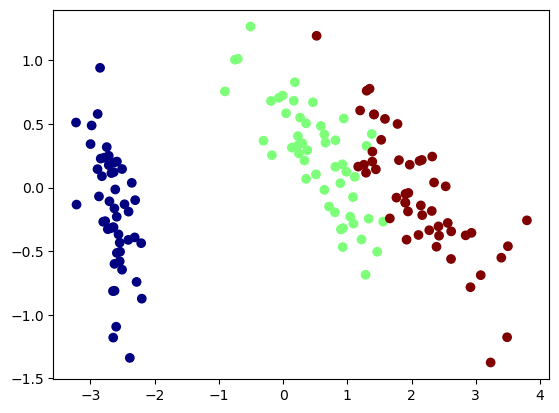

In [32]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs =  np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        eigenvalues = eigenvalues[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

X = load_iris().data
y = load_iris().target

pca = PCA(n_components = 2)
pca.fit(X)
X_projected = pca.transform(X)

print(X.shape)
print(X_projected.shape)

pca1 = X_projected[:, 0]
pca2 = X_projected[:, 1]

plt.scatter(pca1, pca2, c=y, cmap='jet')

(150, 4)
(150, 2)


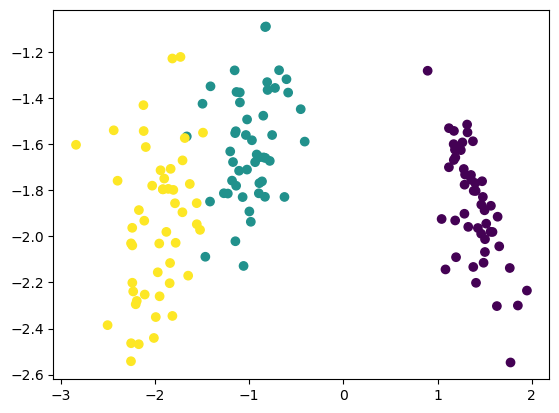

In [40]:
class LDA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.linear_discreminants = None

    def fit(self, X, y):
        n_feautures = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_feautures, n_feautures))
        SB = np.zeros((n_feautures, n_feautures))
        for c in class_labels:
            X_c = X[ y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_feautures, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
            A = np.linalg.inv(SW).dot(SB)
            eigenvalues, eigenvectors = np.linalg.eig(A)
            eigenvectors = eigenvectors.T
            idxs =  np.argsort(eigenvalues)[::-1]
            eigenvectors = eigenvectors[idxs]
            eigenvalues = eigenvalues[idxs]

            self.linear_discreminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discreminants.T)

X = load_iris().data
y = load_iris().target

pca = LDA(n_components = 2)
pca.fit(X, y)
X_projected = pca.transform(X)

print(X.shape)
print(X_projected.shape)

pca1 = X_projected[:, 0]
pca2 = X_projected[:, 1]

plt.scatter(pca1, pca2, c=y)


In [34]:
def h(n):
    H = {'A': 3, 'B': 4, 'C': 2, 'D': 6, 'G': 0, 'S': 5}
    return H[n]

def a_star_algorithm(graph, start, goal):
    open_list = [start]
    closed_list = set()
    g = {start: 0}
    parents = {start: start}

    while open_list:
        open_list.sort(key=lambda v: g[v] + h(v), reverse=True)
        n = open_list.pop()

        if n == goal:
            reconst_path = []
            total_cost = g[n]

            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]
            reconst_path.append(start)
            reconst_path.reverse()
            print(f'Path found: {reconst_path} with total cost: {total_cost}')
            return reconst_path, total_cost

        for (m, weight) in graph[n]:
            if m not in open_list and m not in closed_list:
                open_list.append(m)
                parents[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.append(m)
        closed_list.add(n)

    print('Path does not exist!')
    return None, None

graph = {
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2), ('C', 1)],
    'B': [('D', 5)],
    'C': [('D', 3), ('G', 4)],
    'D': [('G', 2)]
}

path, cost = a_star_algorithm(graph, 'S', 'G')
print(f'Path: {path}')
print(f'Total cost: {cost}')

Path found: ['S', 'A', 'C', 'G'] with total cost: 6
Path: ['S', 'A', 'C', 'G']
Total cost: 6


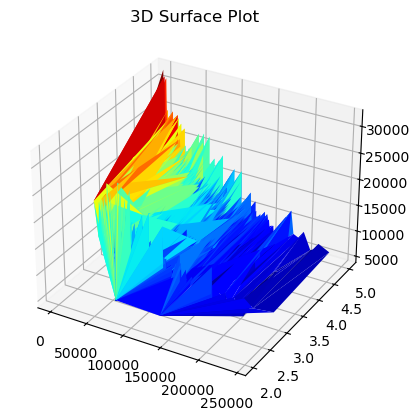

In [2]:
# Visualize the n-dimensional data using 3D surface plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("ToyotaCorolla.csv", index_col = 0, na_values =["??", "????"])

#3d surface plot
x = data['KM']
y = data['Doors']
z = data['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")

plt.show()


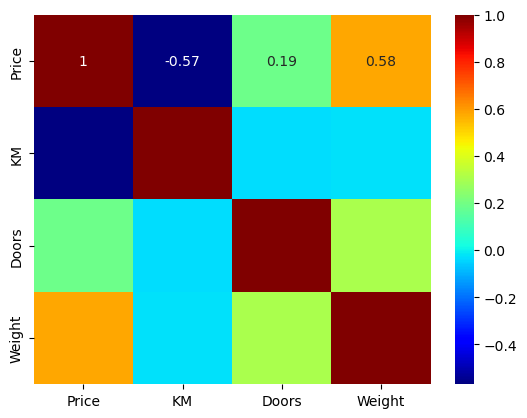

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("./ToyotaCorolla.csv")

sns.heatmap(data[["Price","KM","Doors", "Weight"]].corr(), annot=True, cmap='jet')
plt.show()

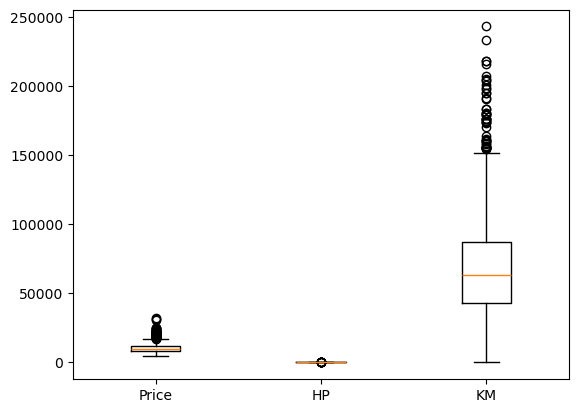

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('./ToyotaCorolla.csv')

plt.boxplot([data["Price"],data["HP"],data["KM"]])

plt.xticks([1,2,3],["Price","HP","KM"])

plt.show()

In [13]:
def alphabeta(depth, nodeIndex, maximizingPlayer, values, alpha, beta, path):
    if depth == 3:
        return values[nodeIndex], path + [nodeIndex]

    if maximizingPlayer:
        best = float('-inf')
        best_path = []
        for i in range(2):
            val, new_path = alphabeta(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, path + [nodeIndex])
            if val > best:
                best = val
                best_path = new_path
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best, best_path
    else:
        best = float('inf')
        best_path = []
        for i in range(2):
            val, new_path = alphabeta(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, path + [nodeIndex])
            if val < best:
                best = val
                best_path = new_path
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best, best_path

# Example tree with depth 3 and 8 terminal nodes
values = [3, 5, 6, 8, 1, 2, 0, -1]

# Start the Alpha-Beta Pruning algorithm
optimal_value, optimal_path = alphabeta(0, 0, True, values, float('-inf'), float('inf'), [])
print("The optimal value is:", optimal_value)
print("The path taken is:", optimal_path)


The optimal value is: 5
The path taken is: [0, 0, 0, 1]


In [1]:


#Write a program to implement the Best First Search (BFS) algorithm.

def best_first_search(graph,start,goal,heuristic, path=[]):
    open_list = [(0,start)]
    closed_list = set()
    closed_list.add(start)

    while open_list:
        open_list.sort(key = lambda x: heuristic[x[1]], reverse=True)
        cost, node = open_list.pop()
        path.append(node)

        if node==goal:
            return cost, path

        closed_list.add(node)
        for neighbour, neighbour_cost in graph[node]:
            if neighbour not in closed_list:
                closed_list.add(neighbour)
                open_list.append((cost+neighbour_cost, neighbour))

    return None


graph = {
    'A': [('B', 10), ('C', 15)],
    'B': [('A', 10), ('E', 15),('D',20)],
    'C': [('A', 15), ('F',20)],
    'D': [('B', 20), ('E',10)],
    'E': [('B', 15), ('D', 10), ('G',30)],
    'F': [('G', 10), ('C', 25)],
    'G': []
}

start = 'A'
goal = 'G'

heuristic = {
    'A': 25,
    'B': 15,
    'C': 35,
    'D': 45,
    'E': 18,
    'F': 19,
    'G': 0
}

result = best_first_search(graph, start, goal, heuristic)

if result:
    print(f"Minimum cost path from {start} to {goal} is {result[1]}")
    print(f"Cost: {result[0]}")
else:
    print(f"No path from {start} to {goal}")


Minimum cost path from A to G is ['A', 'B', 'E', 'G']
Cost: 55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

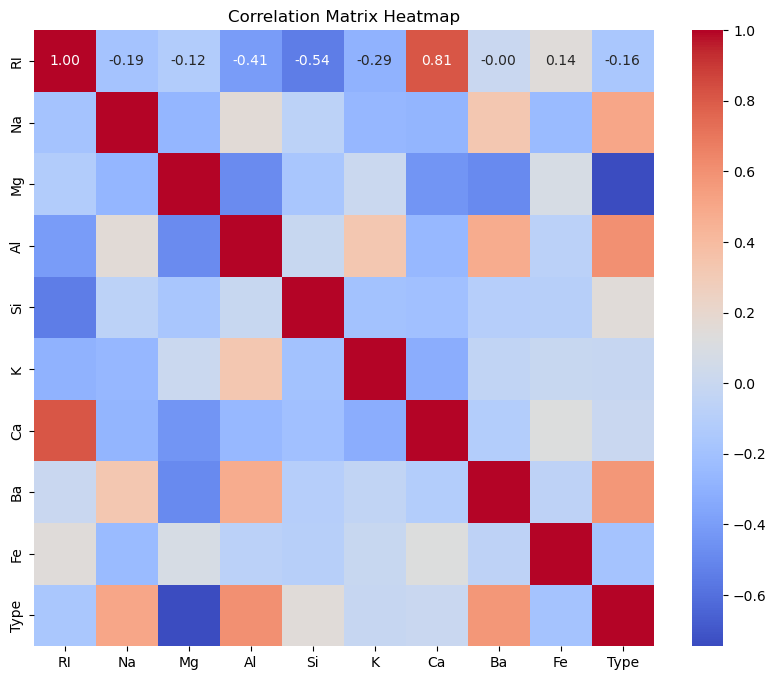

Accuracy with Euclidean Distance: 0.6615384615384615
Accuracy with Manhattan Distance: 0.6923076923076923


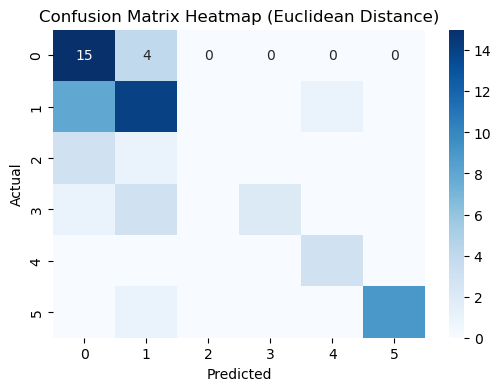

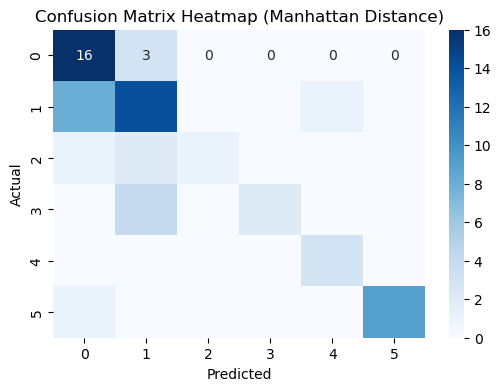

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('glass.csv')

# Display basic information and statistics
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values by imputing with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df[df.columns])

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

# Alternatively, you can use MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Assign features and target variable
y = df['Type'].values
X = X_scaled

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom distance functions
def custom_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def custom_manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Initialize the KNN classifiers with custom distances
k = 3  # Number of neighbors
clf_custom_euclidean = KNeighborsClassifier(n_neighbors=k, metric=custom_euclidean_distance)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors=k, metric=custom_manhattan_distance)

# Fit the KNN classifiers to the training data
clf_custom_euclidean.fit(X_train, y_train)
clf_custom_manhattan.fit(X_train, y_train)

# Make predictions on the test set with custom distances
predictions_custom_euclidean = clf_custom_euclidean.predict(X_test)
predictions_custom_manhattan = clf_custom_manhattan.predict(X_test)

# Calculate accuracy with custom distances
accuracy_custom_euclidean = accuracy_score(y_test, predictions_custom_euclidean)
accuracy_custom_manhattan = accuracy_score(y_test, predictions_custom_manhattan)
print("Accuracy with Euclidean Distance:", accuracy_custom_euclidean)
print("Accuracy with Manhattan Distance:", accuracy_custom_manhattan)

# Calculate confusion matrices for both classifiers
cm_custom_euclidean = confusion_matrix(y_test, predictions_custom_euclidean)
cm_custom_manhattan = confusion_matrix(y_test, predictions_custom_manhattan)

# Plotting the confusion matrix for Custom Euclidean distance
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_euclidean, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.show()

# Plotting the confusion matrix for Custom Manhattan distance
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Manhattan Distance)')
plt.show()

In [ ]:
1